In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import os
import glob

from pandas_profiling import ProfileReport

warnings.filterwarnings('ignore')

In [2]:
path = os.getcwd()
all_files = glob.glob(path + "/kaggle-survey-2021/*.csv")
filesnames = os.listdir('kaggle-survey-2021/')

In [3]:
all_files

['C:\\Users\\dongj\\Desktop\\Analysis_Visualization\\kaggle_analysis\\2021 Kaggle Machine Learning & Data Science Survey/kaggle-survey-2021\\kaggle_survey_2021_responses.csv']

In [4]:
df_orig = pd.read_csv(all_files[0])
df = df_orig.copy()

In [5]:
df.head(2)

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
questions = df.iloc[0,:]

In [7]:
new_df = df.drop(index=0 , axis=1)

In [8]:
new_df.head(2)

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN


In [9]:
# prof = ProfileReport(new_df[new_df.columns[:10]])
# prof.to_file(output_file='output.html')

In [10]:
new_df.head(2)

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN


In [11]:
finish_time_minutes = []
for i in range(1,len(new_df['Time from Start to Finish (seconds)'])+1):
    if round(int(new_df['Time from Start to Finish (seconds)'][i])/60,0) >= 60:
        finish_time_minutes.append(60)
    else:
        finish_time_minutes.append(round(int(new_df['Time from Start to Finish (seconds)'][i])/60,0))

In [12]:
new_df['Time from Start to Finish (minutes)'] = finish_time_minutes

Text(0.5, 1.0, 'Survey Times(minutes)')

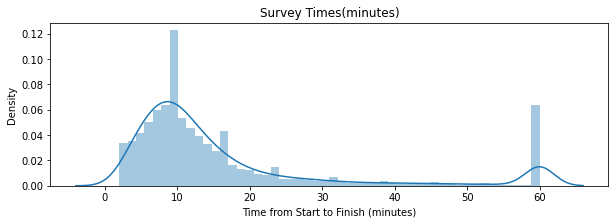

In [13]:
plt.figure(figsize=(10,3))
sns.distplot(new_df['Time from Start to Finish (minutes)'])
plt.title('Survey Times(minutes)')

In [14]:
def multiple_column(Q):
    dic=dict()
    for col in new_df.columns[new_df.columns.str.contains(Q)].value_counts().keys():
        key=new_df[col].value_counts().index[0]
        dic[key]=df[col].value_counts()[0]
    new_dic= dict(sorted(dic.items(), key=lambda item: item[1],  reverse=True))

    coding_key = []
    coding_value =[]
    for key, value in new_dic.items():
        coding_key.append(key)
        coding_value.append(value)
    return coding_key, coding_value

Text(0.5, 1.0, 'What is your age (# years)?')

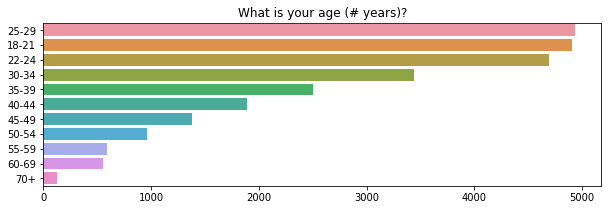

In [15]:
plt.figure(figsize=(10,3))
sns.barplot(y= new_df[new_df.columns[1]].value_counts().keys(), x = new_df[new_df.columns[1]].value_counts().values)
plt.title('What is your age (# years)?')

Text(0.5, 1.0, 'What is your gender?')

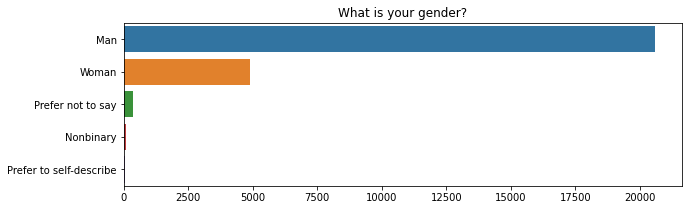

In [16]:
plt.figure(figsize=(10,3))
sns.barplot(y= new_df[new_df.columns[2]].value_counts().keys(), x= new_df[new_df.columns[2]].value_counts().values)
plt.title('What is your gender?')

Text(0.5, 1.0, 'In which country do you currently reside? (Top 5 Countries)')

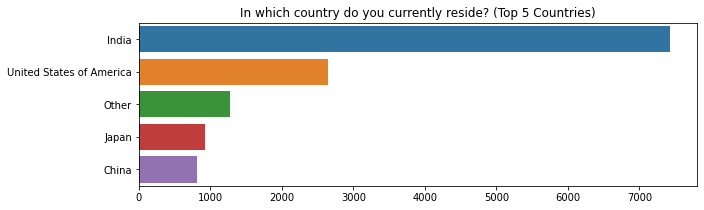

In [17]:
plt.figure(figsize=(10,3))
sns.barplot(y= new_df[new_df.columns[3]].value_counts()[:5].keys(), x = new_df[new_df.columns[3]].value_counts()[:5].values)
plt.title('In which country do you currently reside? (Top 5 Countries)')

Text(0.5, 1.0, 'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?')

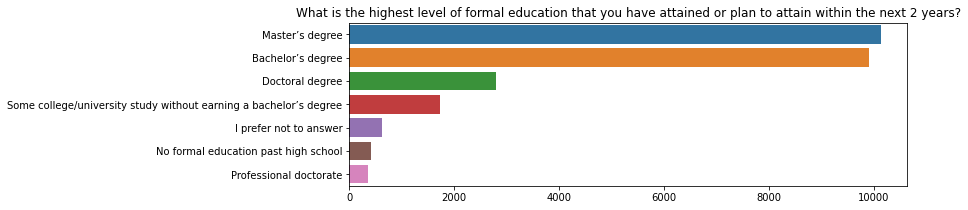

In [18]:
plt.figure(figsize=(10,3))
sns.barplot(y= new_df[new_df.columns[4]].value_counts().keys(), x = new_df[new_df.columns[4]].value_counts().values)
plt.title('What is the highest level of formal education that you have attained or plan to attain within the next 2 years?')

Text(0.5, 1.0, 'Select the title most similar to your current role (or most recent title if retired)')

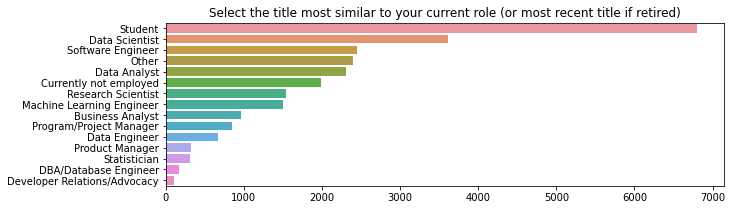

In [19]:
plt.figure(figsize=(10,3))
sns.barplot(y= new_df[new_df.columns[5]].value_counts().keys(), x = new_df[new_df.columns[5]].value_counts().values)
plt.title('Select the title most similar to your current role (or most recent title if retired)')

Text(0.5, 1.0, 'For how many years have you been writing code and/or programming?')

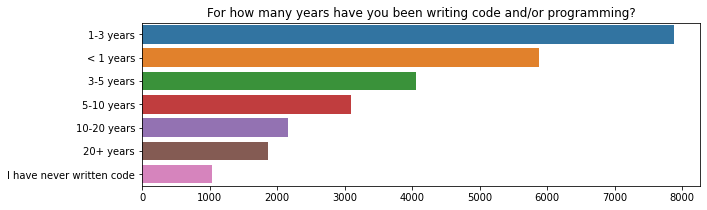

In [20]:
plt.figure(figsize=(10,3))
sns.barplot(y= new_df[new_df.columns[6]].value_counts().keys(), x = new_df[new_df.columns[6]].value_counts().values)
plt.title('For how many years have you been writing code and/or programming?')

In [21]:
dic_7=dict()
for col in new_df.columns[new_df.columns.str.contains('Q7')].value_counts().keys():
    key=new_df[col].value_counts().index[0]
    dic_7[key]=df[col].value_counts()[0]

new_dic_7= dict(sorted(dic_7.items(), key=lambda item: item[1],  reverse=True))
    
coding_key7 = []
coding_value7 =[]
for key, value in new_dic_7.items():
    coding_key7.append(key)
    coding_value7.append(value)

Text(0.5, 1.0, 'What programming languages do you use on a regular basis?')

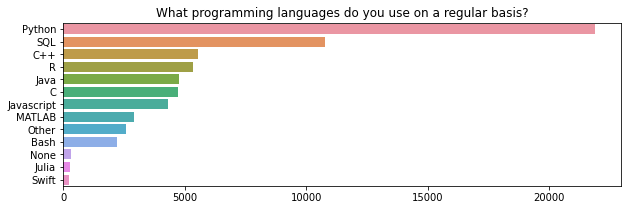

In [22]:
coding_key7, coding_value7= multiple_column('Q7')
plt.figure(figsize=(10,3))
sns.barplot(y= coding_key7, x = coding_value7)
plt.title('What programming languages do you use on a regular basis?')

Text(0.5, 1.0, 'What programming language would you recommend an aspiring data scientist to learn first?')

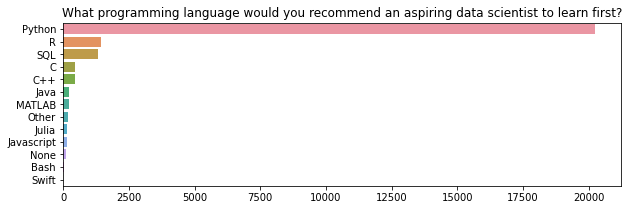

In [23]:
plt.figure(figsize=(10,3))
sns.barplot(y= new_df['Q8'].value_counts().keys(), x = new_df['Q8'].value_counts().values)
plt.title('What programming language would you recommend an aspiring data scientist to learn first?')

Text(0.5, 1.0, 'Which of the following integrated development environments (IDE) do you use on a regular basis?')

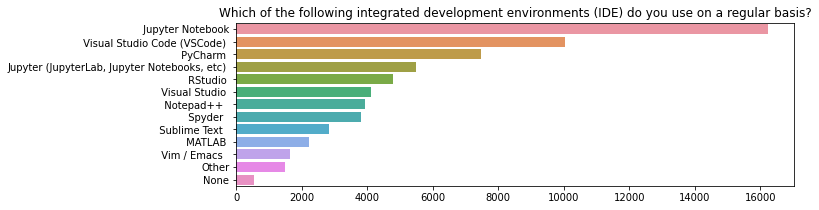

In [24]:
coding_key9, coding_value9= multiple_column('Q9')
plt.figure(figsize=(10,3))
sns.barplot(y= coding_key9, x = coding_value9)
plt.title('Which of the following integrated development environments (IDE) do you use on a regular basis?')

Text(0.5, 1.0, 'Which of the following hosted notebook products do you use on a regular basis?')

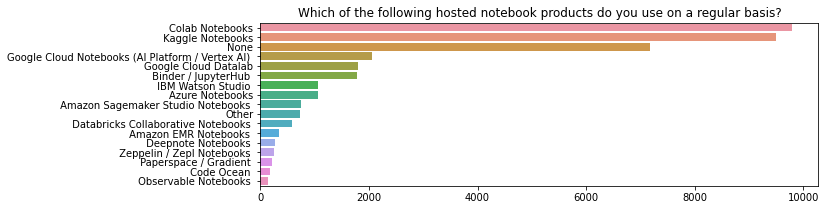

In [25]:
coding_key10, coding_value10= multiple_column('Q10')
plt.figure(figsize=(10,3))
sns.barplot(y= coding_key10, x = coding_value10)
plt.title('Which of the following hosted notebook products do you use on a regular basis?')

Text(0.5, 1.0, 'What type of computing platform do you use most often for your data science projects?')

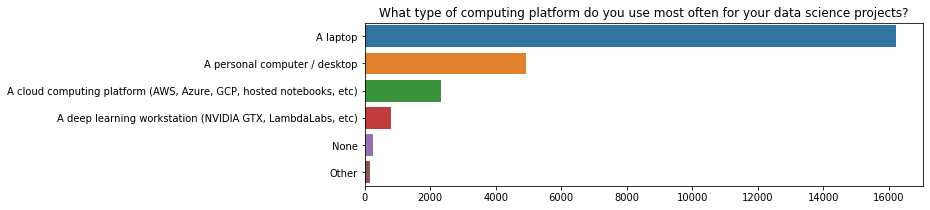

In [26]:
plt.figure(figsize=(10,3))
sns.barplot(y= new_df['Q11'].value_counts().keys(), x = new_df['Q11'].value_counts().values)
plt.title('What type of computing platform do you use most often for your data science projects?')

Text(0.5, 1.0, 'Which types of specialized hardware do you use on a regular basis?')

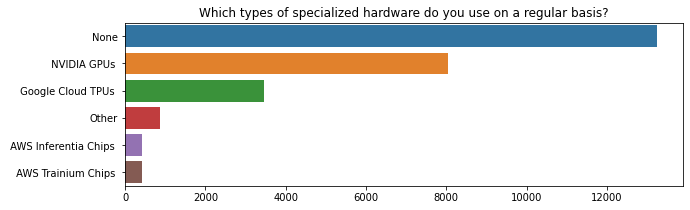

In [27]:
coding_key12, coding_value12= multiple_column('Q12')
plt.figure(figsize=(10,3))
sns.barplot(y= coding_key12, x = coding_value12)
plt.title('Which types of specialized hardware do you use on a regular basis?')

Text(0.5, 1.0, 'Approximately how many times have you used a TPU (tensor processing unit)?')

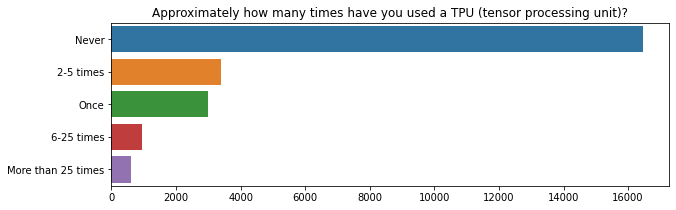

In [28]:
plt.figure(figsize=(10,3))
sns.barplot(y= new_df['Q13'].value_counts().keys(), x = new_df['Q13'].value_counts().values)
plt.title('Approximately how many times have you used a TPU (tensor processing unit)?')

Text(0.5, 1.0, 'What data visualization libraries or tools do you use on a regular basis?')

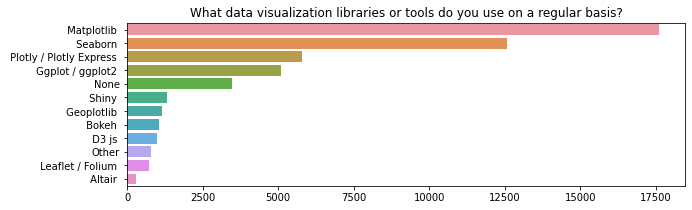

In [29]:
coding_key14, coding_value14= multiple_column('Q14')
plt.figure(figsize=(10,3))
sns.barplot(y= coding_key14, x = coding_value14)
plt.title('What data visualization libraries or tools do you use on a regular basis?')

Text(0.5, 1.0, 'For how many years have you used machine learning methods?')

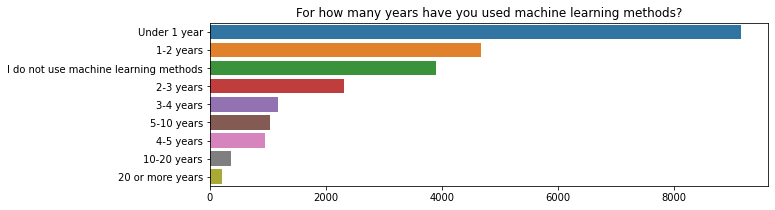

In [30]:
plt.figure(figsize=(10,3))
sns.barplot(y= new_df['Q15'].value_counts().keys(), x = new_df['Q15'].value_counts().values)
plt.title('For how many years have you used machine learning methods?')

Text(0.5, 1.0, 'Which of the following machine learning frameworks do you use on a regular basis?')

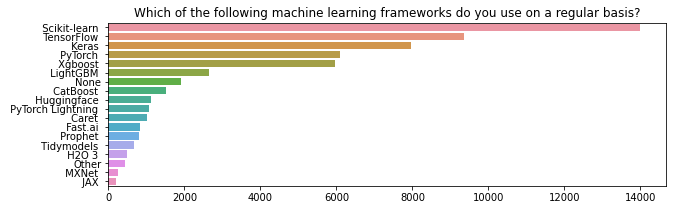

In [31]:
coding_key16, coding_value16= multiple_column('Q16')
plt.figure(figsize=(10,3))
sns.barplot(y= coding_key16, x = coding_value16)
plt.title('Which of the following machine learning frameworks do you use on a regular basis?')

Text(0.5, 1.0, 'Which of the following ML algorithms do you use on a regular basis?')

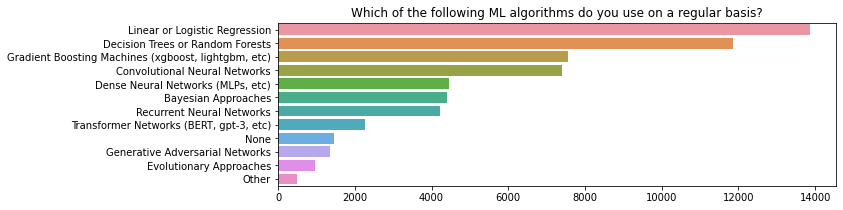

In [32]:
coding_key17, coding_value17= multiple_column('Q17')
plt.figure(figsize=(10,3))
sns.barplot(y= coding_key17, x = coding_value17)
plt.title('Which of the following ML algorithms do you use on a regular basis?')

Text(0.5, 1.0, 'Which categories of computer vision methods do you use on a regular basis?')

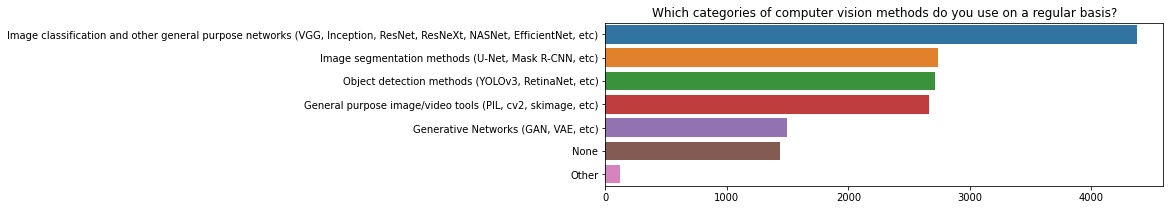

In [33]:
coding_key18, coding_value18= multiple_column('Q18')
plt.figure(figsize=(10,3))
sns.barplot(y= coding_key18, x = coding_value18)
plt.title('Which categories of computer vision methods do you use on a regular basis?')

Text(0.5, 1.0, 'Which of the following natural language processing (NLP) methods do you use on a regular basis?')

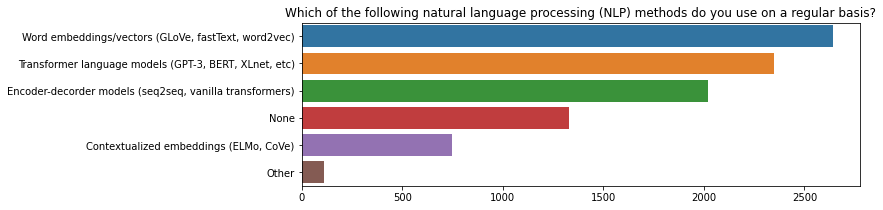

In [34]:
coding_key19, coding_value19= multiple_column('Q19')
plt.figure(figsize=(10,3))
sns.barplot(y= coding_key19, x = coding_value19)
plt.title('Which of the following natural language processing (NLP) methods do you use on a regular basis?')

Text(0.5, 1.0, 'In what industry is your current employer/contract (or your most recent employer if retired)?')

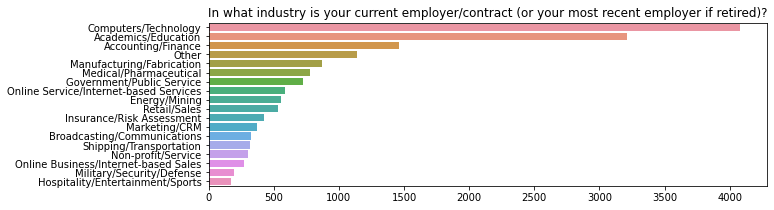

In [35]:
plt.figure(figsize=(10,3))
sns.barplot(y= new_df['Q20'].value_counts().keys(), x = new_df['Q20'].value_counts().values)
plt.title('In what industry is your current employer/contract (or your most recent employer if retired)?')

Text(0.5, 1.0, 'What is the size of the company where you are employed?')

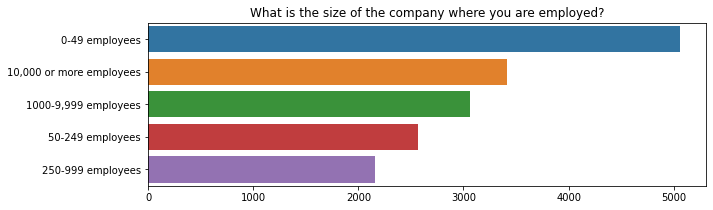

In [36]:
plt.figure(figsize=(10,3))
sns.barplot(y= new_df['Q21'].value_counts().keys(), x = new_df['Q21'].value_counts().values)
plt.title('What is the size of the company where you are employed?')

Text(0.5, 1.0, 'Approximately how many individuals are responsible for data science workloads at your place of business?')

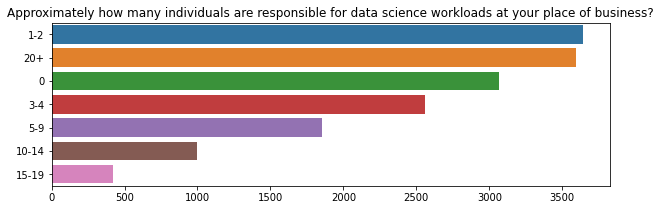

In [37]:
plt.figure(figsize=(10,3))
sns.barplot(y= new_df['Q22'].value_counts().keys(), x = new_df['Q22'].value_counts().values)
plt.title('Approximately how many individuals are responsible for data science workloads at your place of business?')

Text(0.5, 1.0, 'Does your current employer incorporate machine learning methods into their business?')

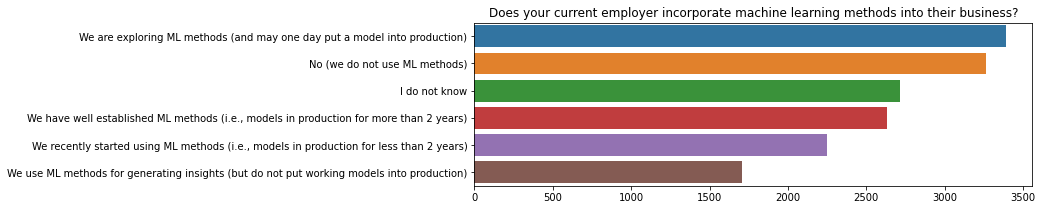

In [38]:
plt.figure(figsize=(10,3))
sns.barplot(y= new_df['Q23'].value_counts().keys(), x = new_df['Q23'].value_counts().values)
plt.title('Does your current employer incorporate machine learning methods into their business?')

Text(0.5, 1.0, 'Select any activities that make up an important part of your role at work')

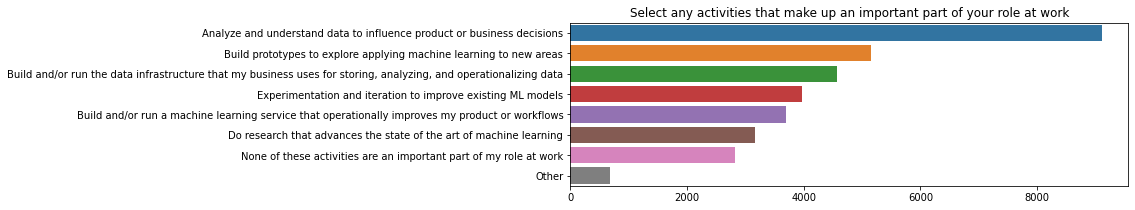

In [39]:
coding_key24, coding_value24= multiple_column('Q24')
plt.figure(figsize=(10,3))
sns.barplot(y= coding_key24, x = coding_value24)
plt.title('Select any activities that make up an important part of your role at work')

Text(0.5, 1.0, 'What is your current yearly compensation (approximate $USD)?')

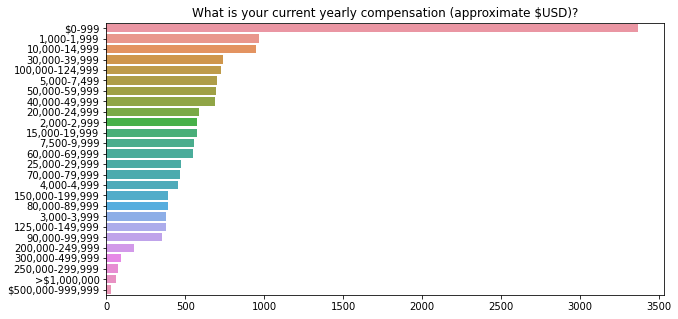

In [40]:
plt.figure(figsize=(10,5))
sns.barplot(y= new_df['Q25'].value_counts().keys(), x = new_df['Q25'].value_counts().values)
plt.title('What is your current yearly compensation (approximate $USD)?')

Text(0.5, 1.0, 'Approximately how much money have you (or your team) spent on machine learning and/or cloud computing services at home (or at work) in the past 5 years (approximate $USD)?')

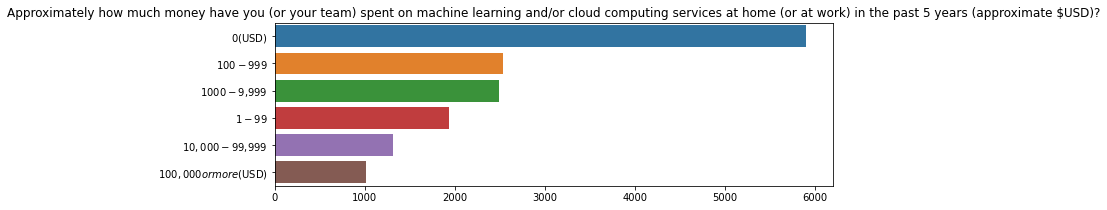

In [41]:
plt.figure(figsize=(10,3))
sns.barplot(y= new_df['Q26'].value_counts().keys(), x = new_df['Q26'].value_counts().values)
plt.title('Approximately how much money have you (or your team) spent on machine learning and/or cloud computing services at home (or at work) in the past 5 years (approximate $USD)?')

Text(0.5, 1.0, 'Which of the following cloud computing platforms do you use on a regular basis?')

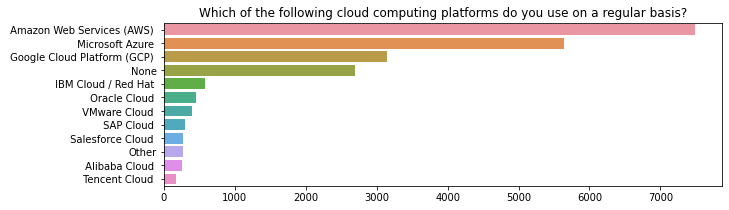

In [42]:
coding_key27, coding_value27= multiple_column('Q27')
plt.figure(figsize=(10,3))
sns.barplot(y= coding_key27, x = coding_value27)
plt.title('Which of the following cloud computing platforms do you use on a regular basis?')

Text(0.5, 1.0, 'Of the cloud platforms that you are familiar with, which has the best developer experience (most enjoyable to use)?')

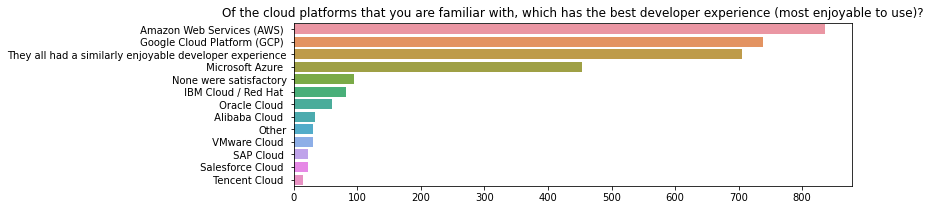

In [43]:
plt.figure(figsize=(10,3))
sns.barplot(y= new_df['Q28'].value_counts().keys(), x = new_df['Q28'].value_counts().values)
plt.title('Of the cloud platforms that you are familiar with, which has the best developer experience (most enjoyable to use)?')

Text(0.5, 1.0, 'Do you use any of the following cloud computing products on a regular basis?')

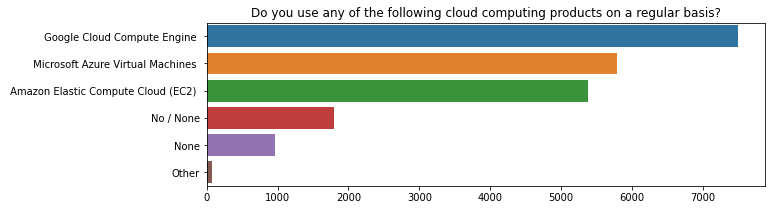

In [44]:
coding_key29, coding_value29= multiple_column('Q29')
plt.figure(figsize=(10,3))
sns.barplot(y= coding_key29, x = coding_value29)
plt.title('Do you use any of the following cloud computing products on a regular basis?')

Text(0.5, 1.0, 'Do you use any of the following managed machine learning products on a regular basis?')

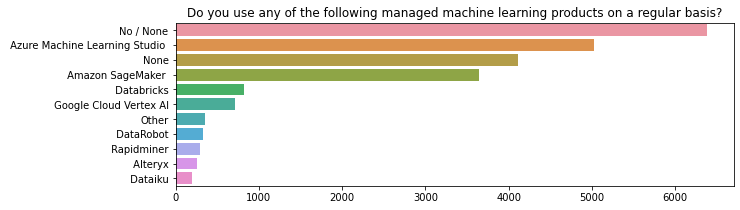

In [45]:
coding_key31, coding_value31= multiple_column('Q31')
plt.figure(figsize=(10,3))
sns.barplot(y= coding_key31, x = coding_value31)
plt.title('Do you use any of the following managed machine learning products on a regular basis?')

Text(0.5, 1.0, 'Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis?')

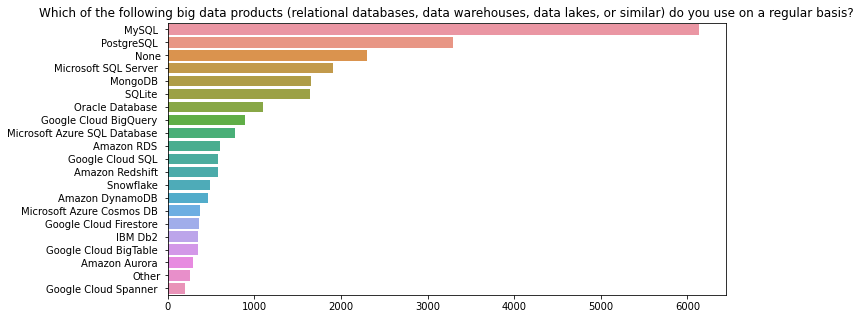

In [46]:
coding_key32, coding_value32= multiple_column('Q32')
plt.figure(figsize=(10,5))
sns.barplot(y= coding_key32, x = coding_value32)
plt.title('Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis?')

Text(0.5, 1.0, 'Which of the following business intelligence tools do you hope to become more familiar with in the next 2 years? ')

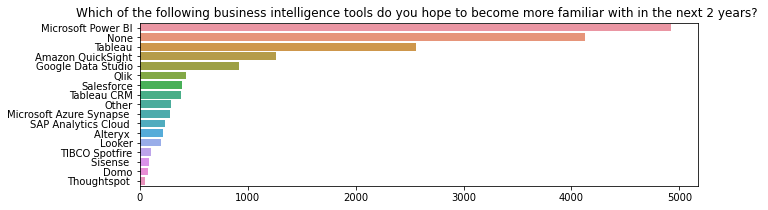

In [47]:
coding_key34, coding_value34= multiple_column('Q34')
plt.figure(figsize=(10,3))
sns.barplot(y= coding_key34, x = coding_value34)
plt.title('Which of the following business intelligence tools do you hope to become more familiar with in the next 2 years? ')

Text(0.5, 1.0, 'Which of the following business intelligence tools do you use most often?')

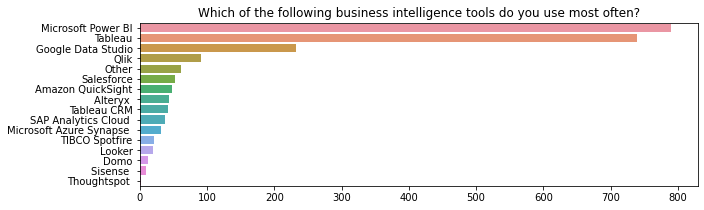

In [48]:
plt.figure(figsize=(10,3))
sns.barplot(y= new_df['Q35'].value_counts().keys(), x = new_df['Q35'].value_counts().values)
plt.title('Which of the following business intelligence tools do you use most often?')

Text(0.5, 1.0, 'Which categories of automated machine learning tools (or partial AutoML tools) do you hope to become more familiar with in the next 2 years?')

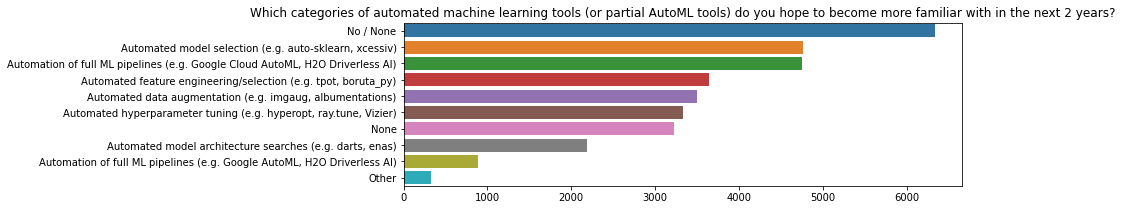

In [49]:
coding_key36, coding_value36= multiple_column('Q36')
plt.figure(figsize=(10,3))
sns.barplot(y= coding_key36, x = coding_value36)
plt.title('Which categories of automated machine learning tools (or partial AutoML tools) do you hope to become more familiar with in the next 2 years?')

Text(0.5, 1.0, 'Which specific automated machine learning tools (or partial AutoML tools) do you hope to become more familiar with in the next 2 years?')

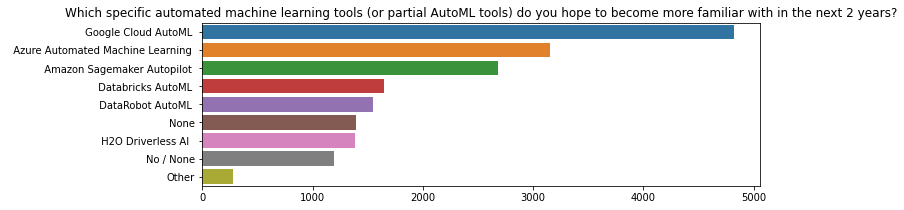

In [50]:
coding_key37, coding_value37= multiple_column('Q37')
plt.figure(figsize=(10,3))
sns.barplot(y= coding_key37, x = coding_value37)
plt.title('Which specific automated machine learning tools (or partial AutoML tools) do you hope to become more familiar with in the next 2 years?')

Text(0.5, 1.0, 'In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments?')

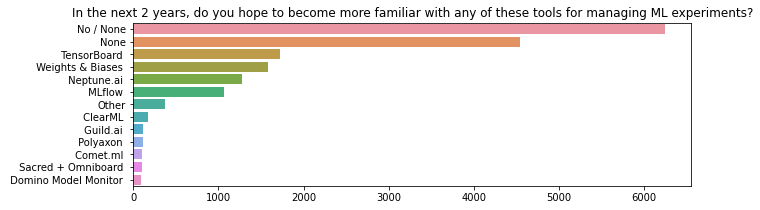

In [51]:
coding_key38, coding_value38= multiple_column('Q38')
plt.figure(figsize=(10,3))
sns.barplot(y= coding_key38, x = coding_value38)
plt.title('In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments?')